In [1]:
import quandl
quandl.ApiConfig.api_key = 'DdXEs2xFciyUXrER9-a7'
df_aapl = quandl.get('WIKI/MSFT')
df_aapl.head()

In [ ]:
df_aapl.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,92.930,94.050,92.21,92.48,23753263.0,0.0,1.0,92.930,94.050,92.21,92.48,23753263.0
2018-03-22,91.265,91.750,89.66,89.79,37578166.0,0.0,1.0,91.265,91.750,89.66,89.79,37578166.0
2018-03-23,89.500,90.460,87.08,87.18,42159397.0,0.0,1.0,89.500,90.460,87.08,87.18,42159397.0
2018-03-26,90.610,94.000,90.40,93.78,55031149.0,0.0,1.0,90.610,94.000,90.40,93.78,55031149.0
2018-03-27,94.940,95.139,88.51,89.47,53704562.0,0.0,1.0,94.940,95.139,88.51,89.47,53704562.0


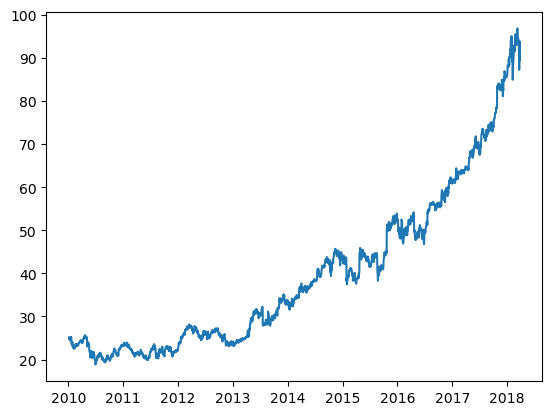

In [ ]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

df = df_aapl['2010':]["Adj. Close"]
plt.plot(df)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df_train = df[:'2018']
df_test = df['2018':]

scaler = MinMaxScaler(feature_range=(0, 1))
df_train_scaler = scaler.fit_transform(df_train.values.reshape(-1, 1))
df_test_scaler = scaler.transform(df_test.values.reshape(-1, 1))

df_train_scaler.shape, df_test_scaler.shape

((2071, 1), (59, 1))

In [ ]:
time_step = 1

train_t0 = df_train_scaler[:-time_step]
train_t1 = df_train_scaler[time_step:]

test_t0 = df_test_scaler[:-time_step]
test_t1 = df_test_scaler[time_step:]

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(1, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(1))

c:\Users\sfj\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,505 (29.32 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit(np.atleast_3d(train_t0),
          train_t1.reshape(-1), epochs=20, batch_size=32)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1118
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0361
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0124
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3461e-04
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0241e-04
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2821e-04
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9331e-04
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3488e-04
Epoch 10/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5167e-04
Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9309e-04
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4274e-04
Epoch 13/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1570e-04
Epoch 14/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7661e-05
Epoch 15/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 362ms/step


Text(0.5, 1.0, 'MAPE: 1.404542474438714')

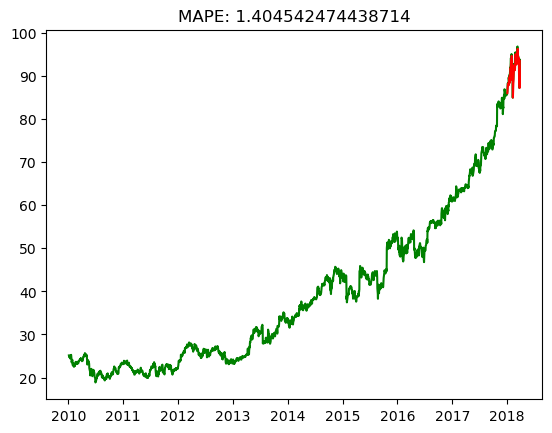

In [ ]:
test_pred = model.predict(np.atleast_3d(test_t0))
test_pred = scaler.inverse_transform(test_pred)

df_pred = df.copy()
df_pred[len(df_pred)-len(test_pred):] = test_pred.reshape(-1)
df_pred[:-len(test_pred)] = np.nan

def mape(y_true, y_pred):
    n = len(y_true)
    mape = 100 * np.sum(np.abs((y_true-y_pred)/y_true)) / n
    return mape


y_true = df[len(df_pred)-len(test_pred):].values
y_pred = test_pred.reshape(-1)
mape = mape(y_true, y_pred)

plt.plot(df, 'g')
plt.plot(df_pred, 'r')
plt.title(f"MAPE: {mape}")